In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/Tweets.csv')

train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
train_data.fillna('', inplace=True)

In [5]:
train_data = train_data[train_data['sentiment'] != '']

In [6]:
train_data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


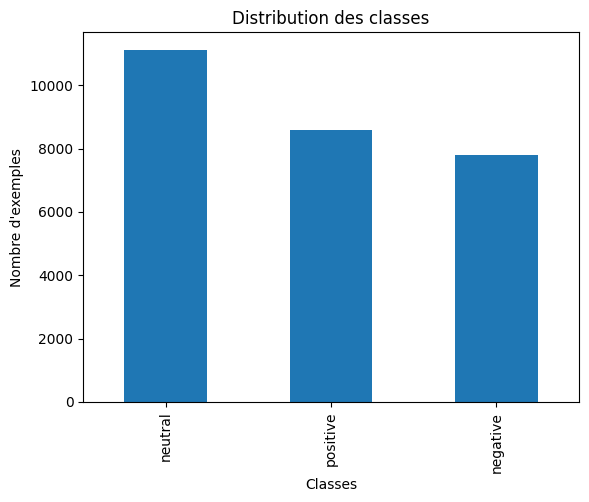

In [7]:
import matplotlib.pyplot as plt

class_counts = train_data['sentiment'].value_counts()
print(class_counts)
class_counts.plot(kind='bar', title='Distribution des classes')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'exemples')
plt.show()


In [8]:
import string
from nltk.stem import WordNetLemmatizer
import re
import nltk # You need to import nltk here as well
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()
def Preprocess_listofSentence(listofSentence):
  preprocess_list = []
  for sentence in listofSentence :
    # Check if sentence is a string before processing
    if isinstance(sentence, str):
      # Directly use re.sub to replace URLs
      sentence = re.sub(r'http[s]?://\S+\s?-?', '', sentence)
      sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

      sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

      tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num) # Now nltk is accessible

      words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

      words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

      sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())



      preprocess_list.append(sentence_clean)
    else:
      # Handle non-string values (e.g., NaN) by appending an empty string
      preprocess_list.append("")

  return preprocess_list
import nltk

nltk.download('punkt_tab')
train_data['clained_text'] = Preprocess_listofSentence(train_data['text'])
preprocess_list1=train_data['clained_text']
print('Phrase de base : '+train_data['text'][2])
print('Phrase nettoyée : '+preprocess_list1[2])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Phrase de base : my boss is bullying me...
Phrase nettoyée : bullying


In [9]:
preprocess_list1

,clained_text
0,id going
1,sad miss san
2,bullying
3,interview leave alone
4,son put release already bought
...,...
27476,wish could come see u husband lost job cant af...
27477,rake client made clear net dont force learn ne...
27478,good enjoy break probably need hectic weekend ...
27479,worth


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Définir le nombre maximal de mots à utiliser et la longueur des séquences
max_words = 10000  # Nombre maximal de mots dans le vocabulaire
max_seq_len = 100  # Longueur maximale des séquences

# Initialiser le tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['clained_text'])  # Ajuster le tokenizer sur le texte nettoyé

# Convertir les textes en séquences d'indices
sequences = tokenizer.texts_to_sequences(train_data['clained_text'])

# Padder les séquences pour qu'elles aient toutes la même longueur
X = pad_sequences(sequences, maxlen=max_seq_len, padding='post', truncating='post')

# Encoder les étiquettes (sentiment) en catégories
y = pd.get_dummies(train_data['sentiment']).values



In [11]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
# Change here: using train_data['sentiment'] directly as target
X_resampled, y_resampled = smote_tomek.fit_resample(X, train_data['sentiment'])

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
# Change here: one-hot encoding after resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
y_train = pd.get_dummies(y_train) # One-hot encode after splitting
y_test = pd.get_dummies(y_test)  # One-hot encode after splitting

# Diviser les données en ensembles d'entraînement et de validation
# Change here: one-hot encoding after resampling
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val = pd.get_dummies(y_val) # One-hot encode after splitting

In [12]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into training and testing sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, train_data['sentiment'], test_size=0.2, random_state=42
)

# THEN apply SMOTETomek to the TRAINING set ONLY
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# One-hot encode the target variables AFTER resampling
y_train_resampled = pd.get_dummies(y_train_resampled)
y_test = pd.get_dummies(y_test)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.25, random_state=42
)

X_resampled shape: (28392, 100)
y_resampled shape: (28392,)


In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-02-11 14:48:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-11 14:48:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-11 14:48:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LayerNormalization
# Download and unzip GloVe embeddings
embedding_index = {}
embedding_dim = 100
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Créer une matrice d'embedding
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Intégrer les embeddings dans le modèle
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_len,
              weights=[embedding_matrix], trainable=True),
    Dropout(0.6),
    Conv1D(128, 5, activation='relu'),
    LayerNormalization(),
    MaxPooling1D(2),  # Utiliser un MaxPooling1D au lieu de GlobalMaxPooling1D
    Bidirectional(LSTM(64, return_sequences=False)),
    LayerNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),

    Dropout(0.6),
    Dense(3, activation='softmax')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [59]:
# Entraîner le modèle
from tensorflow.keras.optimizers import Adam


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [early_stopping]


history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=20, batch_size=8, callbacks=callbacks, verbose=1)


# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.6202 - loss: 0.8916 - val_accuracy: 0.6260 - val_loss: 0.8583
Epoch 2/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.6288 - loss: 0.8777 - val_accuracy: 0.6347 - val_loss: 0.8553
Epoch 3/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.6325 - loss: 0.8711 - val_accuracy: 0.6368 - val_loss: 0.8498
Epoch 4/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.6440 - loss: 0.8528 - val_accuracy: 0.6345 - val_loss: 0.8669
Epoch 5/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.6478 - loss: 0.8426 - val_accuracy: 0.6278 - val_loss: 0.8612
Epoch 6/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6482 - loss: 0.8410 - val_accuracy: 0.6334 - val_loss: 0.8682
Epoch 7/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.6581 - loss: 0.8185 - val_accuracy: 0.6320 - val_loss: 0.8574
Epoch 8/20
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6640 -